# Imports

In [99]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

from scripts.clusterer import CluStream
#from scripts.dynamic_clusterer import DynamicClusterer
from scripts.dc_v2 import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
colors = get_colors()

def import_and_shuffle_csv(file_path):

  final_2d_data = np.loadtxt(file_path, delimiter=',')

  reference_data = final_2d_data[:1000]
  np.random.shuffle(reference_data)

  batch1 = final_2d_data[1000:1200]
  np.random.shuffle(batch1)

  batch2 = final_2d_data[1200:1400]
  np.random.shuffle(batch2)

  batch3 = final_2d_data[1400:1600]
  np.random.shuffle(batch3)

  batch4 = final_2d_data[1600:1800]
  np.random.shuffle(batch4)

  batch5 = final_2d_data[1800:2000]
  np.random.shuffle(batch5)

  return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [101]:
file_path = './data/final_2d_data_brightness.csv'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [102]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
  clustream_model = CluStream(
      max_micro_clusters=200,
      time_window=100,
      seed=0,
  )
  drift_detector = drift.PageHinkley(delta= 0.0005, threshold=threshold)
  
  dynamic_clusterer = DynamicClusterer(data, clustream_model, drift_detector, colors, x_limits=(-10, 20), y_limits=(0,15), threshold=threshold)
  
  
  return dynamic_clusterer

New model created - id: 24727
{'id': 0, 'center': [np.float64(5.225658095709169), np.float64(7.0391272247427725)], 'radius': np.float64(1.1964016382572447)}
{'id': 1, 'center': [np.float64(3.4061238609179108), np.float64(2.9008011555029456)], 'radius': np.float64(1.107377737563783)}
<!> Change detected! Possible input drift at timestamp 11 ----> Apply macroclustering <!>



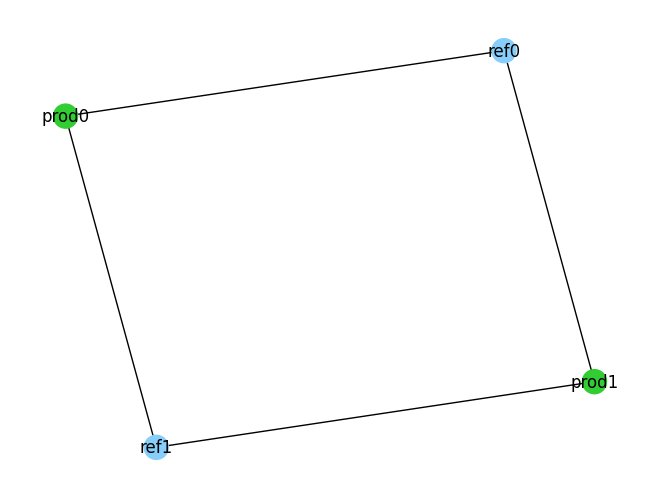

{0: [0, 1], 1: [0, 1]}
(!) [0] are merged in [np.float64(5.302836935929575), np.float64(6.941772364606763)]
(!) [1] are merged in [np.float64(5.302836935929575), np.float64(6.941772364606763)]


TypeError: 'int' object is not subscriptable

In [103]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

#clustream.draw_snapshots()
clustream.draw_gif(title="brightness")

In [ ]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/96702' and its contents removed successfully.
Deleted 96702
